### О задании

В этом задании вы:
- ознакомитесь с тем, что происходит "внутри" метода опорных векторов и логистической регрессии
- познакомитесь с калибровкой вероятности
- изучите методы трансформации переменных и методы отбора признаков
- попробуете оценить экономический эффект модели

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Часть 0. SVM, LR и калибровка вероятностей. 

Сгенерируем синтетические данные.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов и логистической регрессии.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили линейный вариант без ядрового перехода, что соответствует линейному ядру (`LinearSVC` или же `SVC(kernel='linear')` в `sklearn.svm`). Подберите параметр регуляризации `C` (можете воспользоваться кросс-валидацией или отделить валидационную выборку от обучающей). 

In [ ]:
#your code here
from sklearn import svm
from sklearn.model_selection import cross_validate
C = [0.04, 1, 10] #значения параметров

In [1343]:
svc1 = svm.SVC(C = C[0], kernel = "linear",probability=True)
svc2 = svm.SVC(C = C[1], kernel = "linear",probability=True)
svc3 = svm.SVC(C = C[2], kernel = "linear",probability=True)

In [1344]:
cv_results1 = cross_validate(svc1, X_train, y_train)
sorted(cv_results1.keys())
np.mean(cv_results1['test_score'])

0.7815714285714286

In [1345]:
cv_results2 = cross_validate(svc2, X_train, y_train)
sorted(cv_results2.keys())
np.mean(cv_results2['test_score'])

0.7817142857142858

In [1346]:
cv_results3 = cross_validate(svc3, X_train, y_train)
sorted(cv_results3.keys())
np.mean(cv_results3['test_score'])

0.7814285714285714

In [1347]:
max(np.mean(cv_results1['test_score']),np.mean(cv_results2['test_score']),np.mean(cv_results3['test_score']))

0.7817142857142858

In [ ]:
# выбираем C = 1

In [1348]:
svc2 = svm.SVC(C = C[1], kernel = "linear",probability=True).fit(X_train,y_train)

На тестовой части посчитайте AUC-ROC, AUC-PR с точностью до 5 знаков. Постройте ROC и PR кривые, сравните их с ответами случайного классификатора. Заметим, что с помощью `sklearn` можно посчитать обе метрики двумя разными способами - в чем их различия? Сравните результаты. 

In [336]:
from sklearn.metrics import roc_auc_score

auc2 = roc_auc_score(y_test, svc2.predict_proba(X_test)[:,1])
print("roc_auc_score SVM1 %.5f" % auc2)

roc_auc_score SVM1 0.84813


In [1352]:
precision, recall, thresholds = precision_recall_curve(y_test, svc2.predict_proba(X_test)[:,1])
auc_precision_recall = auc(recall, precision)
auc_precision_recall
print("auc_precision_recall %.5f" % auc_precision_recall)

auc_precision_recall 0.81487


In [1353]:
#инециализируем случайный классификатор
ns_probs = [0 for _ in range(len(y_test))] 
ns_auc = roc_auc_score(y_test, ns_probs)

precision, recall, thresholds = precision_recall_curve(y_test, ns_probs)
auc_precision_recall = auc(recall, precision)
auc_precision_recall

print("roc_auc_score SVM1 %.5f" % ns_auc )
print("average_precision_scoreaps2 %.5f" % auc_precision_recall)

roc_auc_score SVM1 0.50000
average_precision_scoreaps2 0.75283


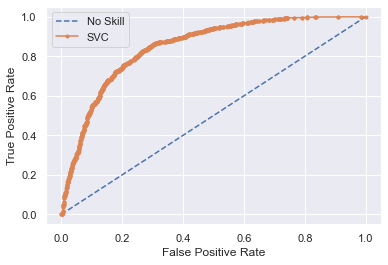

In [1354]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import roc_curve, auc
# plot the roc curve for the model
lr_fprs, lr_tprs, lr_thr = roc_curve(y_test, svc2.predict_proba(X_test)[:,1])
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fprs, lr_tprs, marker='.', label='SVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

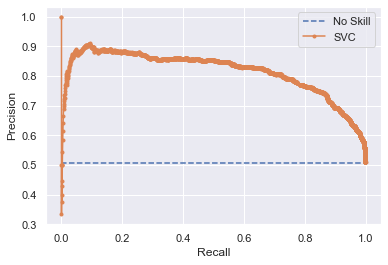

In [1357]:
# precision-recall curve 
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

lr_precision, lr_recall, _ = precision_recall_curve(y_test, svc2.predict_proba(X_test)[:,1])
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='SVC')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

А теперь проделайте все то же самое для логистической регрессии (LR) — обучение, подбор параметра регуляризации (используйте L2-регуляризацию), вычисление всех метрик и построение кривых.

In [1358]:
#your code here
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)
lr_probs = model.predict_proba(X_test)
lr_probs

array([[0.29121259, 0.70878741],
       [0.98758794, 0.01241206],
       [0.82093626, 0.17906374],
       ...,
       [0.94018647, 0.05981353],
       [0.13508322, 0.86491678],
       [0.07144774, 0.92855226]])

In [1359]:
# https://medium.com/analytics-vidhya/a-complete-understanding-of-how-the-logistic-regression-can-perform-classification-a8e951d31c76
from sklearn.model_selection import GridSearchCV
parameters={'C':[10**-6,10**-5,10**-3,10**-4, 10**-2, 10**-1,10**0, 10**2, 10**3,10**4,10**5,10**6],
            'penalty':['l2']
            } 
clf_log = LogisticRegression(n_jobs=-1)
clf = GridSearchCV(clf_log, parameters, cv=5, scoring='neg_log_loss',return_train_score =True,n_jobs=-1,verbose=5)
clf.fit(X_train, y_train)
train_loss= clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score']

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [1360]:
clf = clf.best_estimator_
clf

LogisticRegression(C=0.1, n_jobs=-1)

In [1361]:
clf.fit(X_train, y_train)
lr_probs = clf.predict_proba(X_test)
lr_probs

array([[0.29193829, 0.70806171],
       [0.98745576, 0.01254424],
       [0.82052122, 0.17947878],
       ...,
       [0.93992597, 0.06007403],
       [0.1357428 , 0.8642572 ],
       [0.0717673 , 0.9282327 ]])

In [1366]:
#вычисление метрик
auc = roc_auc_score(y_test, lr_probs[:,1])
print("roc_auc_score LogisticRegression %.5f" % auc)

roc_auc_score LogisticRegression 0.84785


In [1372]:
precision, recall, thresholds = precision_recall_curve(y_test, lr_probs[:,1])
auc_precision_recall = auc(recall, precision)
auc_precision_recall
print("average_precision_score %.5f" % auc_precision_recall)

average_precision_score 0.82917


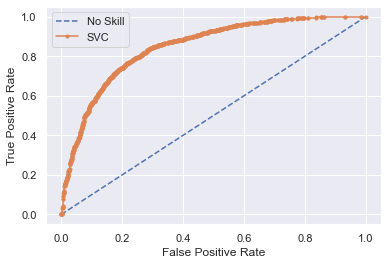

In [1368]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import roc_curve, auc
# plot the roc curve for the model
lr_fprs, lr_tprs, lr_thr = roc_curve(y_test, lr_probs[:,1])
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fprs, lr_tprs, marker='.', label='SVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

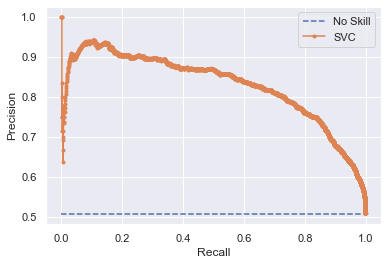

In [1369]:
# precision-recall curve 
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs[:,1])
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='SVC')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

В названии метода опорных векторов присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью `make_classification` с 2 признаками, обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут `support_vectors_`). В этот раз, если необходимо, вместо `LinearSVC` воспользуйтесь `SVC(kernel='linear')`, так как только в нём есть информация об опорных векторах.

In [ ]:
# https://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html
# https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-visualize-support-vectors-of-your-svm-classifier.md

In [1377]:
#your code here
# генерация датасета с помощью make_classification с 2 признаками
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

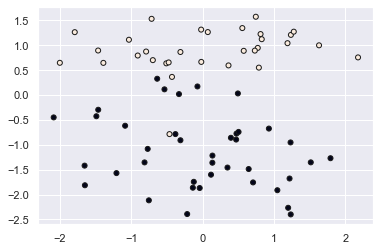

In [1378]:
# как выглядят все наши данные
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train, s=25, edgecolor="k")
pyplot.show()

In [1379]:
#обучение 
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Fit data
clf = clf.fit(X_train, y_train)

In [1380]:
# Get support vector indices
support_vector_indices = clf.support_
print(support_vector_indices)

[ 4  5 18 30 42 64 66 11 20 29 34 35 36 51]


In [1381]:
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)

[7 7]


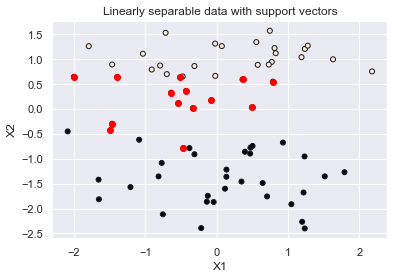

In [1382]:
# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1], marker="o", c=y_train, s=25, edgecolor="k")
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

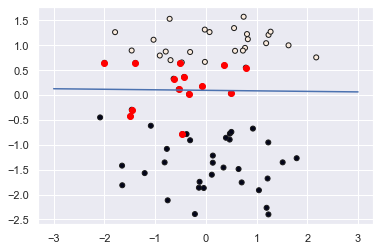

In [1383]:
import numpy as np
from seaborn import scatterplot
w = clf.coef_[0]
b = clf.intercept_[0]
x_visual = np.linspace(-3,3)
y_visual = -(w[0] / w[1]) * x_visual - b / w[1]

plt.scatter(X_train[:,0], X_train[:,1], marker="o", c=y_train, s=25, edgecolor="k")
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.plot(x_visual, y_visual)
plt.show()

В отличие от метода опорных векторов, логистическая регрессия не пытается построить разделяющую гиперплоскость, а приближает в каждой точке пространства объектов правдоподобие положительных ответов $p(y=+1|x)$. Попробуйте нарисовать это распределение на плоскости, не забудьте отметить на ней все объекты. Вам может помочь функция `plt.pcolor`.

In [1391]:
#https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/

In [1392]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

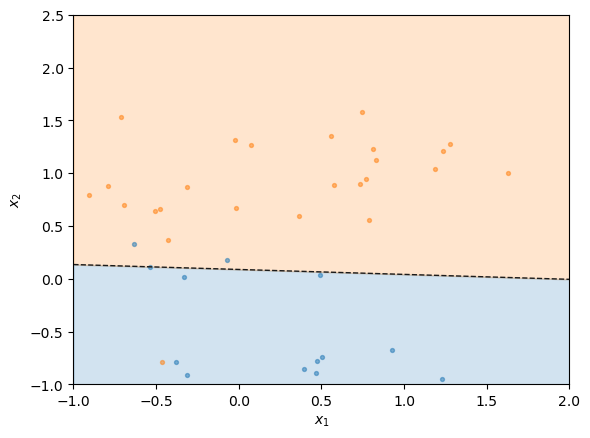

In [1393]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# Fit the data to a logistic regression model.
X=X_train
y = y_train
clf = sklearn.linear_model.LogisticRegression()
clf.fit(X, y)

# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -1, 2
ymin, ymax = -1, 2.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*X[y==0].T, s=8, alpha=0.5)
plt.scatter(*X[y==1].T, s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()

__Задание 2.__ Калибровка вероятностей.

__(1 балл)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [1406]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2) 
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))  
    plt.figure(figsize=(6,6))
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.ylim([-0.05, 1.05])
    plt.grid()

Сгенерируйте синтетический датасет аналогично использованному в самом первом задании. Постройте калибровочные кривые на тестовой части для логистической регрессии и метода опорных векторов (не забудьте перевести его предсказания в $[0;1]$). Изучите распределение ответов классификаторов (постройте гистограммы с помощью `plt.hist`). Чем они различаются? Чем вы можете объяснить это?

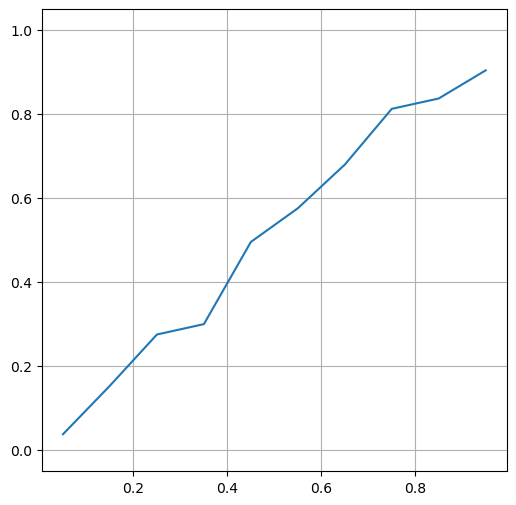

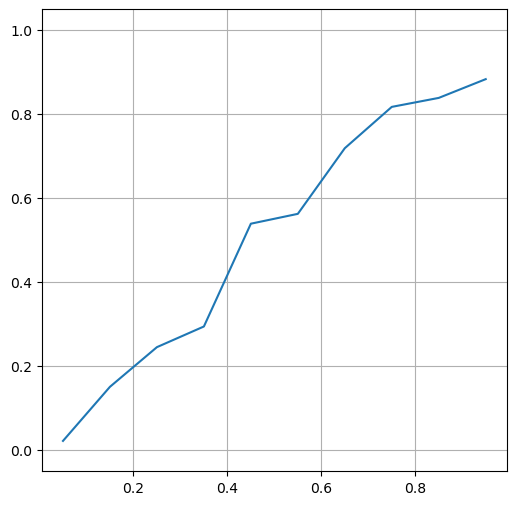

In [1407]:
#your code here
X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)[:,1]
plot_calibration_curve(y_test, lr_probs)

clf = svm.SVC(kernel = "linear",probability=True).fit(X_train,y_train)
# Fit data
predict = clf.predict_proba(X_test)[:,1]
predict 
plot_calibration_curve(y_test, predict)

In [1409]:
def plot_calibration_curve_with_return(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2) 
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1)) 
    return  bin_middle_points, bin_real_ratios    
    plt.figure(figsize=(6,6))
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.ylim([-0.05, 1.05])
    plt.grid()

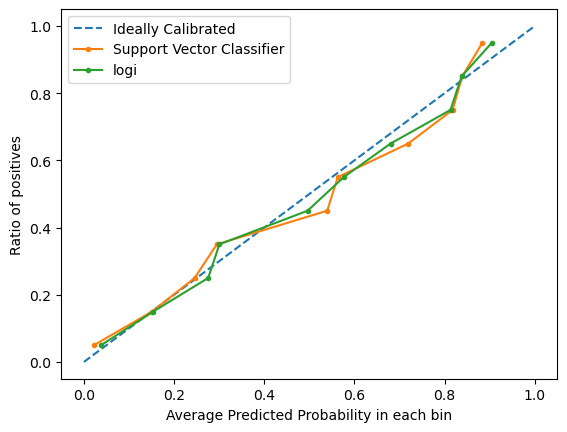

In [1410]:
import matplotlib.pyplot as plt
import numpy as np


bin_middle_points1 , bin_real_ratios1  = plot_calibration_curve_with_return(y_test, predict)
bin_middle_points2 , bin_real_ratios2  = plot_calibration_curve_with_return(y_test, lr_probs)


x, y = calibration_curve(y_test, predict, n_bins = 10, normalize = True)
 
# Plot calibration curve
 
# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')
 
# Plot model's calibration curve
plt.plot(bin_real_ratios1, bin_middle_points1, marker = '.', label = 'Support Vector Classifier')
plt.plot(bin_real_ratios2, bin_middle_points2, marker = '.', label = 'logi')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()
# из картинки видно, что логистическая регрессия ближе к идеальному варианту, чем svm
#https://www.geeksforgeeks.org/calibration-curves/

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


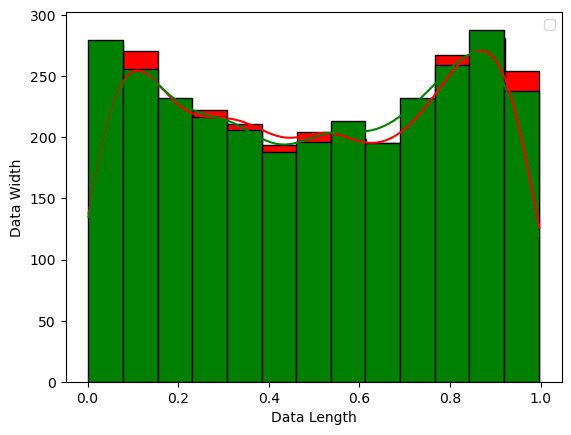

In [1413]:
import seaborn as sns
import matplotlib.pyplot as plt
datf = sns.load_dataset("iris")
z= sns.histplot(x=lr_probs, color="red", alpha = 1.0, kde = True)
z= sns.histplot(x=predict,  color="green", alpha = 1.0, kde = True)
z.set_xlabel("Data Length")
z.set_ylabel("Data Width")
plt.legend()
plt.show()

Воспользуйтесь `CalibratedClassifierCV` из `sklearn` для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

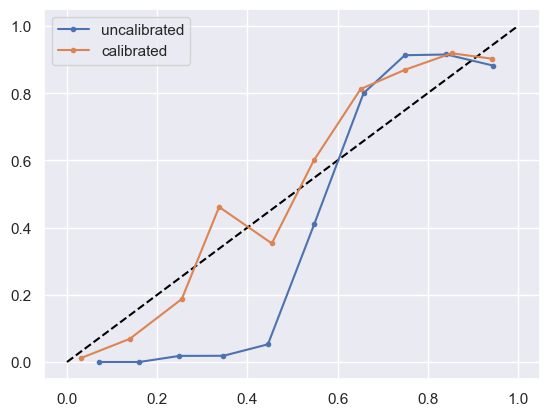

In [1416]:
# SVM reliability diagrams with uncalibrated and calibrated probabilities

# https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/


from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from matplotlib import pyplot

# predict uncalibrated probabilities
def uncalibrated(trainX, testX, trainy):
    # fit a model
    model = SVC()
    model.fit(trainX, trainy)
    # predict probabilities
    return model.decision_function(testX)

# predict calibrated probabilities
def calibrated(trainX, testX, trainy):
    # define model
    model = SVC()
    # define and fit calibration model
    calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
    calibrated.fit(trainX, trainy)
    # predict probabilities
    return calibrated.predict_proba(testX)[:, 1]

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# uncalibrated predictions
yhat_uncalibrated = uncalibrated(trainX, testX, trainy)
# calibrated predictions
yhat_calibrated = calibrated(trainX, testX, trainy)
# reliability diagrams
fop_uncalibrated, mpv_uncalibrated = calibration_curve(testy, yhat_uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(testy, yhat_calibrated, n_bins=10)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot model reliabilities
pyplot.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label = 'uncalibrated')
pyplot.plot(mpv_calibrated, fop_calibrated, marker='.' , label = 'calibrated')
leg = plt.legend(loc = 'upper left')
pyplot.show()


#из графика видно, что улучшилось

# Часть 1. Работа с переменными.

__Подготовка данных.__

Загрузим данные [UCI Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing). Этот датасет содержит информацию о банковском телефонном маркетинге, объектом в нем является телефонный звонок потенциальному клиенту с предложением некоторой услуги (утверждается, что это краткосрочный депозит), целевой переменной - ответ клиента (согласился ли он открыть депозит?). В качестве признакового описания используются характеристики клиента (образование, брак и т.д.), данные о звонке и различные экономические индикаторы - более подробная информация представлена в файле `bank-additional-names.txt`.

In [1417]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip bank-additional.zip
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

--2022-12-19 21:59:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: 'bank-additional.zip.5'

bank-additional.zip 100%[===================>] 434.15K   431KB/s    in 1.0s    

2022-12-19 21:59:40 (431 KB/s) - 'bank-additional.zip.5' saved [444572/444572]

Archive:  bank-additional.zip
replace bank-additional/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [1604]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

In [1502]:
X_raw = df
y = X_raw['y']
X_raw = X_raw.drop('y',axis=1)
X_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


__Задание 3 (0.5 балла).__ Разделите выборку на обучающую и тестовую в соотношении 3:1. Зафиксируйте `random_state=777`, также используйте `stratify`. Один из столбцов в данных не несет информации для решения задачи — какой? Отбросьте его. 



In [1503]:
X_raw = X_raw.drop(columns=['duration'])

In [1504]:
#your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.25, random_state=777,stratify=y) # на тест выделим 25% на train 75%
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30891, 19), (10297, 19), (30891,), (10297,))

Закодируйте категориальные признаки с помощью `OrdinalEncoder`. Посчитайте качество (в этом задании будем работать c `AUC-PR`) при применении логистической регрессии. Замерьте время, потребовавшееся на обучение модели (с учетом кодирования признаков).

__Вопрос__: почему в данном задании мы выбрали метрикой именно `AUC-PR`, а не, к примеру, `AUC-ROC`?

__Ваш ответ__:

In [1505]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
23424,33,self-employed,married,basic.4y,no,no,no,cellular,aug,wed,7,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1
39990,32,blue-collar,married,basic.4y,no,yes,no,telephone,jun,tue,1,999,1,failure,-1.7,94.055,-39.8,0.761,4991.6
9340,27,student,single,high.school,unknown,no,no,telephone,jun,fri,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
5365,34,blue-collar,married,basic.9y,no,yes,no,telephone,may,fri,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2797,41,technician,married,basic.9y,no,no,no,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0


In [1506]:
cat_features_mask = (X_train.dtypes == "object").values 
X_train[X_train.columns[cat_features_mask]].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
23424,self-employed,married,basic.4y,no,no,no,cellular,aug,wed,nonexistent
39990,blue-collar,married,basic.4y,no,yes,no,telephone,jun,tue,failure
9340,student,single,high.school,unknown,no,no,telephone,jun,fri,nonexistent
5365,blue-collar,married,basic.9y,no,yes,no,telephone,may,fri,nonexistent
2797,technician,married,basic.9y,no,no,no,telephone,may,wed,nonexistent


In [1507]:
enc = OrdinalEncoder()
result_time=0  
start_time = time.time()
X_train[X_train.columns[cat_features_mask]] = enc.fit_transform(X_train[X_train.columns[cat_features_mask]])
result_time += (time.time() - start_time)

In [1508]:
start_time = time.time()
X_test[X_test.columns[cat_features_mask]] = enc.fit_transform(X_test[X_test.columns[cat_features_mask]])
result_time += (time.time() - start_time)

In [1509]:
#переводим ответы yes no в 1 0
map_ans = {'yes': 1, 'no': 0}
start_time = time.time()
y_train, y_test = y_train.map(map_ans), y_test.map(map_ans)
result_time += (time.time() - start_time)
y_train

23424    0
39990    0
9340     0
5365     0
2797     0
        ..
15182    0
12996    0
9453     0
31206    0
19924    0
Name: y, Length: 30891, dtype: int64

In [1510]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve

# Create classifier using logistic regression

model = LogisticRegression(max_iter=5000)

start_time = time.time()
model.fit(X_train, y_train)
result_time += (time.time() - start_time)

lr_probs = model.predict(X_test)
lr_probs

array([0, 0, 0, ..., 0, 0, 0])

In [1511]:
result_time

0.8017528057098389

In [1512]:
prec, recall, thresholds = precision_recall_curve(y_test, lr_probs)

In [1513]:
auc_pr = auc(recall,prec)
auc_pr

0.48569941165810443

__Задание 4 (0.5 балла).__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на кодирование категориальных признаков и обучение модели.



In [1521]:
X = df
y = X['y']
X = X.drop(columns=['duration','y'],axis=1)
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [1522]:
result_time = 0
start_time = time.time()
X_one_hot = pd.get_dummies(X, drop_first=True)
result_time += (time.time() - start_time)
X_one_hot

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [1523]:
start_time = time.time()
map_ans = {'yes': 1, 'no': 0}
y = y.map(map_ans)
result_time += (time.time() - start_time)
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [1524]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_one_hot, y, test_size=0.25, random_state=777,stratify=y) # на тест выделим 25% на train 75%
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30891, 52), (10297, 52), (30891,), (10297,))

In [1525]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve

# Create classifier using logistic regression

model = LogisticRegression(max_iter=5000)
start_time = time.time()
model.fit(X_train, y_train)
result_time += (time.time() - start_time)

lr_probs = model.predict(X_test)
lr_probs

array([0, 0, 0, ..., 0, 0, 0])

In [1526]:
prec, recall, thresholds = precision_recall_curve(y_test, lr_probs)
auc_pr = auc(recall,prec)
auc_pr

0.5019932111127111

In [1527]:
result_time

0.4566919803619385

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирования категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 5 (1 балл).__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущими экспериментами (с учетом кодирования признаков). Заметили ли вы что-то интересное?


__Бонус (1 балл)__: Здесь и далее реализуйте вычисление счетчиков с помощью трансформера (наследуйтесь от классов `BaseEstimator, TransformerMixin` из `sklearn.base`). Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики нужно считать только по обучающей выборке в методе `fit`. Ваш трансформер должен принимать при инициализации список из категориальных признаков и изменять только их. 


In [13]:
#your code here

In [1703]:
result_time = 0

In [1704]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
df = df.drop(columns=['duration'],axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [1705]:
start_time = time.time()
_map = {'yes': 1, 'no': 0}
df['y'] = df['y'].map(_map)
result_time += (time.time() - start_time)

In [1706]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [1707]:
# Source: https://maxhalford.github.io/blog/target-encoding-done-the-right-way/
#https://www.youtube.com/watch?v=Bao9GGZMLhU
def calc_smooth_mean(df1, cat_name, target):
  
    # Compute the number of values and the mean of each group
    agg = df.groupby(cat_name)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means ) / (counts )

    # Replace each value by the according smoothed mean
    return df1[cat_name].map(smooth)

In [1708]:
cat_features_mask = (df.dtypes == "object").values  # делаем булеву маску, чтобы выбрать столбцы с типом object 

In [1709]:
df.columns[cat_features_mask]

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [1710]:
# df.columns[cat_features_mask]

for each in df.columns[cat_features_mask]:
    start_time = time.time()
    df[each] = calc_smooth_mean(df1=df, cat_name=each, target='y')
    result_time += (time.time() - start_time)
    


In [1711]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.100000,0.101573,0.102490,0.12879,0.108796,0.113402,0.052313,0.064347,0.099483,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0.081381,0.101573,0.108355,0.05153,0.108796,0.113402,0.052313,0.064347,0.099483,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0.081381,0.101573,0.108355,0.12879,0.116194,0.113402,0.052313,0.064347,0.099483,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.129726,0.101573,0.082024,0.12879,0.108796,0.113402,0.052313,0.064347,0.099483,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0.081381,0.101573,0.108355,0.12879,0.108796,0.109315,0.052313,0.064347,0.099483,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0


In [1712]:
y = df['y']
df = df.drop(columns=['y'],axis=1)

In [1713]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.25, random_state=777,stratify=y) # на тест выделим 25% на train 75%
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30891, 19), (10297, 19), (30891,), (10297,))

In [1714]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve

# Create classifier using logistic regression

model = LogisticRegression(max_iter=5000)
start_time = time.time()
model.fit(X_train, y_train)
result_time += (time.time() - start_time)

lr_probs = model.predict(X_test)
lr_probs

array([0, 0, 0, ..., 0, 0, 0])

In [1715]:
prec, recall, thresholds = precision_recall_curve(y_test, lr_probs)
auc_pr = auc(recall,prec)
auc_pr

0.5014497220518324

In [1716]:
result_time

0.4291388988494873

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 



А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — доля объектов положительного класса в выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значением. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!


__Задание 7 (1 балл).__ Добавьте сглаживание, описанное выше и повторите эксперименты.

In [1720]:
# Source: https://maxhalford.github.io/blog/target-encoding-done-the-right-way/
#https://www.youtube.com/watch?v=Bao9GGZMLhU
def calc_smooth_mean(df1, cat_name, target, weight):
    # Compute the global mean
    mean = df[target].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(cat_name)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + weight * mean) / (counts + weight)

    # Replace each value by the according smoothed mean
    
    return df1[cat_name].map(smooth)


In [1721]:
result_time = 0
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
df = df.drop(columns=['duration'],axis=1)
start_time = time.time()
_map = {'yes': 1, 'no': 0}
df['y'] = df['y'].map(_map)
result_time += (time.time() - start_time)


In [1722]:
cat_features_mask = (df.dtypes == "object").values  # делаем булеву маску, чтобы выбрать столбцы с типом object 
df.columns[cat_features_mask]

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [1723]:
for each in df.columns[cat_features_mask]:
    start_time = time.time()
    df[each] = calc_smooth_mean(df1=df, cat_name=each, target='y',weight=10)
    result_time += (time.time() - start_time)

In [1724]:
y = df['y']
df = df.drop(columns=['y'],axis=1)

In [1725]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.25, random_state=777,stratify=y) # на тест выделим 25% на train 75%
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30891, 19), (10297, 19), (30891,), (10297,))

In [1726]:
model = LogisticRegression(max_iter=5000)
start_time = time.time()
model.fit(X_train, y_train)
result_time += (time.time() - start_time)

lr_probs = model.predict(X_test)
prec, recall, thresholds = precision_recall_curve(y_test, lr_probs)
auc_pr = auc(recall,prec)
auc_pr

0.5003338668491464

In [1727]:
result_time

0.5890603065490723

__Задание 8 (0.5 балла).__ В данных имеется признак "возраст клиента". Сейчас мы интерпретируем его как числовой, что в общем случае для линейной модели может быть неверной гипотезой. Тем не менее, у этого признака есть довольно много уникальных значений (сколько?), поэтому применять к нему one-hot кодирование может оказаться излишним. Попробуйте закодировать возраст с помощью счетчиков. Стало ли лучше?



In [1770]:
#your code here
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
df = df.drop(columns=['duration'],axis=1)
_map = {'yes': 1, 'no': 0}
df['y'] = df['y'].map(_map)
df = pd.get_dummies(df , drop_first=True)
df['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

In [1771]:
len(df['age'].unique()) # уникальных значений

78

In [1772]:
df['age'] = calc_smooth_mean(df1=df, cat_name='age', target='y',weight=10)

In [1773]:
df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.113623,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0.096229,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0.093015,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,0.072696,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0.113623,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [1774]:
y = df['y']
df = df.drop(columns=['y'],axis=1)

In [1775]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.25, random_state=777,stratify=y) # на тест выделим 25% на train 75%
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30891, 52), (10297, 52), (30891,), (10297,))

In [1776]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)


lr_probs = model.predict(X_test)
prec, recall, thresholds = precision_recall_curve(y_test, lr_probs)
auc_pr = auc(recall,prec)
auc_pr

0.4973515888457636

Можно пойти и в обратную сторону. У нас есть признаки "месяц и день недели" для звонка. Попробуйте интерпретировать их как числовые (месяц от 0 до 12, дни недели от 0 до 4). Стало ли лучше в этот раз?

In [1784]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
df = df.drop(columns=['duration'],axis=1)
_map = {'yes': 1, 'no': 0}
df['y'] = df['y'].map(_map)

In [1785]:
df[['month','day_of_week']].head()

,month,day_of_week
0,may,mon
1,may,mon
2,may,mon
3,may,mon
4,may,mon


In [1787]:
print(df['day_of_week'].unique())
print(df['month'].unique())

['mon' 'tue' 'wed' 'thu' 'fri']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


In [1788]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit_transform(df[['month','day_of_week']])
df[['month','day_of_week']] = enc.fit_transform(df[['month','day_of_week']])

In [1789]:
df[['month','day_of_week']].head()

,month,day_of_week
0,6.0,1.0
1,6.0,1.0
2,6.0,1.0
3,6.0,1.0
4,6.0,1.0


In [1791]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,6.0,1.0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,6.0,1.0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,6.0,1.0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,6.0,1.0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,6.0,1.0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [1799]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.25, random_state=777,stratify=y) # на тест выделим 25% на train 75%
X_train.shape, X_test.shape, y_train.shape, y_test.shape
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

lr_probs = model.predict(X_test)
prec, recall, thresholds = precision_recall_curve(y_test, lr_probs)
auc_pr = auc(recall,prec)
auc_pr

0.48757444138957995

# Часть 2. Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про банковский телефонный маркетинг.

In [1800]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

X = df.drop(columns=['duration', 'y'])
y = (df.y == 'yes')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

Как вы помните, в данных много категориальных признаков (сейчас давайте интерпретировать возраст как числовой). Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [1802]:
#your code here

df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

X = df.drop(columns=['duration', 'y'])
y = (df.y == 'yes')

print(f"Shape before encoding: {X.shape}")
X = pd.get_dummies(X, drop_first=True)
print(f"Shape after encoding: {X.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

Shape before encoding: (41188, 19)
Shape after encoding: (41188, 52)


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — `AUC-PR`. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [1804]:
#your code here
#переводим ответы yes no в 1 0
map_ans = {True: 1, False: 0}
y_train, y_test = y_train.map(map_ans), y_test.map(map_ans)


In [1805]:
y_train

24486    0
20631    1
33638    0
18407    0
33138    0
        ..
23749    0
20396    0
12996    0
31206    0
19924    0
Name: y, Length: 32950, dtype: int64

In [1806]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve

# Create classifier using logistic regression

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [1807]:
lr_probs = model.predict(X_test)
prec, recall, thresholds = precision_recall_curve(y_test, lr_probs)
auc_pr = auc(recall,prec)
auc_pr

0.49593449567025555

### Встроенные методы

Допустим, мы хотим оставить только 40 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8 (0.5 балла).__ Оставьте 40 признаков с наибольшим модулем соответствующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков.

Изменилось ли качество? Как?



In [1808]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

X = df.drop(columns=['duration', 'y'])
y = (df.y == 'yes')
y = y.map(map_ans)
X = pd.get_dummies(X, drop_first=True)
from sklearn import preprocessing

normalizer = preprocessing.MinMaxScaler()
X_real_norm_np = normalizer.fit_transform(X)
X = pd.DataFrame(data=X_real_norm_np)
X.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

In [1809]:
#your code here
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
model.coef_

array([[-0.01868917, -2.04965496, -1.21352619, -0.4052128 , -4.46944131,
         3.18743179,  0.56124482,  0.74213125, -0.18764792, -0.20486987,
        -0.03178906, -0.11355165, -0.07758136,  0.28238387,  0.0182007 ,
        -0.10103457,  0.21703849, -0.00610068, -0.12573071, -0.07033405,
        -0.00600683,  0.0313153 ,  0.20478947,  0.14234923,  0.05326902,
         0.0527853 ,  0.2358552 ,  0.04259126,  0.14026683,  0.13588601,
        -0.22125812, -0.12572353, -0.08260651, -0.03434129, -0.08260651,
        -0.06346312, -0.62027504,  0.23777637,  0.27296486,  0.12336214,
        -0.29878571,  1.19699775, -0.5320131 , -0.41883249, -0.11202915,
        -0.04256664, -0.27952109,  0.06375227,  0.02454785,  0.13789913,
         0.46350448,  0.62582084]])

In [1812]:
importance = model.coef_[0]
from operator import itemgetter
d = {}

for i,v in enumerate(importance):
    d[i] = abs(v)

from operator import itemgetter
sorted_ = dict(sorted(d.items(), key=itemgetter(1)))
sorted_
# может убрать 
# 20 17 14 0 48 21 10 33 45 27 25 24

{20: 0.0060068327226010165,
 17: 0.006100676363058001,
 14: 0.018200697750820748,
 0: 0.01868916842887675,
 48: 0.024547845667059115,
 21: 0.031315295340033966,
 10: 0.031789064111297,
 33: 0.034341286097404375,
 45: 0.04256664197361998,
 27: 0.04259125958431516,
 25: 0.05278529643855092,
 24: 0.05326901773547495,
 35: 0.06346311565501472,
 47: 0.06375226714527191,
 19: 0.07033404591166054,
 12: 0.07758136482275561,
 32: 0.08260651111179856,
 34: 0.08260651111179856,
 15: 0.10103457406915133,
 44: 0.11202914587789567,
 11: 0.1135516464639943,
 39: 0.12336214379503876,
 31: 0.125723533238359,
 18: 0.12573071051366255,
 29: 0.135886011533599,
 49: 0.13789913095947126,
 28: 0.14026683211202468,
 23: 0.14234922966458496,
 8: 0.18764791983860218,
 22: 0.2047894731768215,
 9: 0.20486987325419012,
 16: 0.21703849294883618,
 30: 0.22125812115673002,
 26: 0.23585519782024753,
 37: 0.23777637102052346,
 38: 0.2729648562050881,
 46: 0.2795210892261384,
 13: 0.28238387099022966,
 40: 0.29878570628

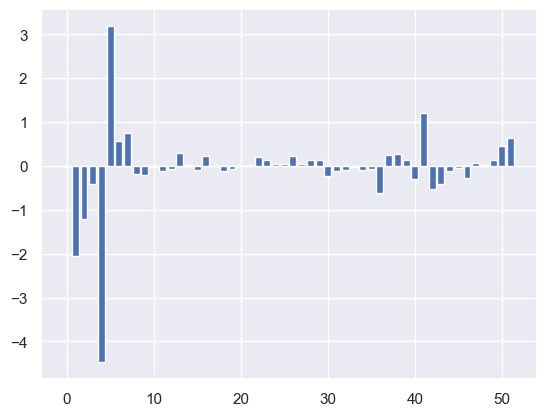

In [1815]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [1816]:
cols = [20, 17, 14, 0, 48, 21, 10, 33, 45, 27, 25, 24]
X_train.drop(X_train.columns[cols], axis =1)

,1,2,3,4,5,6,7,8,9,11,12,13,15,16,18,19,22,23,26,28,29,30,31,32,34,35,36,37,38,39,40,41,42,43,44,46,47,49,50,51
24486,0.018182,1.0,0.0,0.687500,0.389322,0.368201,0.806393,0.877883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
20631,0.000000,1.0,0.0,1.000000,0.484412,0.615063,0.981864,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
33638,0.018182,1.0,0.0,0.333333,0.269680,0.192469,0.146679,0.512287,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
18407,0.000000,1.0,0.0,1.000000,0.669135,0.338912,0.982544,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
33138,0.000000,1.0,0.0,0.333333,0.269680,0.192469,0.148946,0.512287,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23749,0.072727,1.0,0.0,1.000000,0.484412,0.615063,0.981183,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
20396,0.072727,1.0,0.0,1.000000,0.484412,0.615063,0.982090,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12996,0.036364,1.0,0.0,1.000000,0.669135,0.338912,0.981183,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31206,0.000000,1.0,0.0,0.333333,0.269680,0.192469,0.158694,0.512287,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [1817]:
X_test.drop(X_test.columns[cols], axis =1)

,1,2,3,4,5,6,7,8,9,11,12,13,15,16,18,19,22,23,26,28,29,30,31,32,34,35,36,37,38,39,40,41,42,43,44,46,47,49,50,51
22906,0.036364,1.0,0.0,1.000000,0.484412,0.615063,0.981864,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13292,0.000000,1.0,0.0,1.000000,0.669135,0.338912,0.981183,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4081,0.000000,1.0,0.0,0.937500,0.698753,0.602510,0.957606,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6947,0.000000,1.0,0.0,0.937500,0.698753,0.602510,0.958059,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
27141,0.000000,1.0,0.0,0.687500,0.389322,0.368201,0.767853,0.877883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.000000,1.0,0.0,0.937500,0.698753,0.602510,0.957153,0.859735,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28953,0.018182,1.0,0.0,0.333333,0.340608,0.154812,0.174790,0.512287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13501,0.090909,1.0,0.0,1.000000,0.669135,0.338912,0.981410,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4387,0.018182,1.0,0.0,0.937500,0.698753,0.602510,0.957153,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1818]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
model.coef_

array([[-0.01868917, -2.04965496, -1.21352619, -0.4052128 , -4.46944131,
         3.18743179,  0.56124482,  0.74213125, -0.18764792, -0.20486987,
        -0.03178906, -0.11355165, -0.07758136,  0.28238387,  0.0182007 ,
        -0.10103457,  0.21703849, -0.00610068, -0.12573071, -0.07033405,
        -0.00600683,  0.0313153 ,  0.20478947,  0.14234923,  0.05326902,
         0.0527853 ,  0.2358552 ,  0.04259126,  0.14026683,  0.13588601,
        -0.22125812, -0.12572353, -0.08260651, -0.03434129, -0.08260651,
        -0.06346312, -0.62027504,  0.23777637,  0.27296486,  0.12336214,
        -0.29878571,  1.19699775, -0.5320131 , -0.41883249, -0.11202915,
        -0.04256664, -0.27952109,  0.06375227,  0.02454785,  0.13789913,
         0.46350448,  0.62582084]])

In [1819]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [1820]:
prec, recall, thresholds = precision_recall_curve(y_test, model.predict(X_test))
auc_pr = auc(recall,prec)
auc_pr

0.49874781416397174

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отмасштабируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [1821]:
# тоже самое но для неотмасштабированных данных.
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

X = df.drop(columns=['duration', 'y'])
y = (df.y == 'yes')
y = y.map(map_ans)
y
X = pd.get_dummies(X, drop_first=True)
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
model.coef_

array([[ 3.47710366e-03, -4.95843295e-02, -1.88732913e-03,
        -2.67020577e-01, -1.99164649e-01,  3.34769672e-01,
         1.65945408e-02, -1.32046002e-01, -5.93337117e-03,
        -2.00553844e-01, -8.65529207e-03, -1.35609421e-02,
        -1.60527593e-02,  1.01221962e-01,  1.11817686e-02,
        -5.60955796e-02,  6.90977031e-02,  2.80734965e-02,
        -1.03383659e-02, -1.00873629e-03, -8.30323844e-02,
         9.59026328e-02,  2.56568043e-03, -1.89768225e-02,
        -7.93193716e-02, -3.53181543e-02,  9.81717066e-04,
         5.37011794e-03,  1.52241517e-01,  2.97525909e-02,
        -1.76354879e-01, -3.28072407e-04, -1.37231936e-02,
        -1.81993170e-02, -1.37231936e-02, -3.46923199e-02,
        -3.57050306e-01,  8.49245147e-02,  2.31103470e-02,
         2.53421401e-01,  8.59856211e-02,  1.79972325e-01,
        -6.56019979e-01, -5.77964352e-02,  1.38431001e-02,
        -1.58877142e-02, -2.04028382e-01,  7.04948892e-02,
         3.93233934e-02,  1.02555616e-01,  2.45530710e-0

In [1822]:
importance = model.coef_[0]
d = {}
for i,v in enumerate(importance):
    d[i] = abs(v)

from operator import itemgetter
sorted_ = dict(sorted(d.items(), key=itemgetter(1)))
sorted_
# 31, 26, 19, 2, 22, 0, 27, 8, 10, 18, 14, 11

{31: 0.0003280724067708565,
 26: 0.0009817170660259618,
 19: 0.001008736287861353,
 2: 0.0018873291336391443,
 22: 0.002565680431970803,
 0: 0.003477103655996226,
 27: 0.005370117938443024,
 8: 0.0059333711709050815,
 10: 0.00865529207456116,
 18: 0.010338365922366399,
 14: 0.011181768591120068,
 11: 0.013560942109478813,
 32: 0.01372319362757722,
 34: 0.01372319362757722,
 44: 0.013843100053787995,
 45: 0.015887714220359974,
 12: 0.016052759333165155,
 6: 0.016594540781929783,
 33: 0.018199316954194203,
 23: 0.018976822483714833,
 38: 0.023110346961646086,
 51: 0.024491474441390007,
 17: 0.02807349649405676,
 29: 0.029752590918088493,
 35: 0.0346923198912735,
 25: 0.03531815426373165,
 48: 0.03932339336805692,
 1: 0.04958432952309273,
 15: 0.056095579582178666,
 43: 0.057796435153601194,
 16: 0.06909770308736181,
 47: 0.07049488920441124,
 24: 0.07931937159709902,
 20: 0.08303238437897045,
 37: 0.08492451468305649,
 40: 0.08598562106917627,
 21: 0.0959026327788399,
 13: 0.101221961760

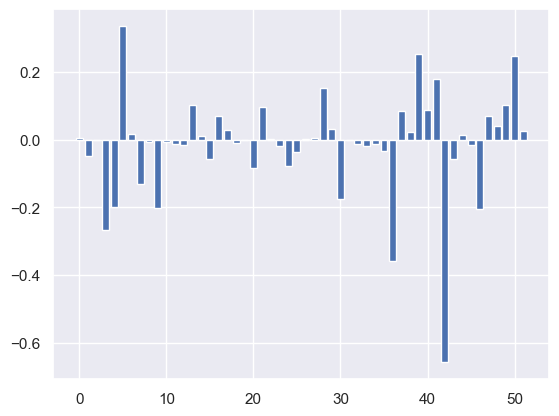

In [1823]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [1824]:
cols = [31, 26, 19, 2, 22, 0, 27, 8, 10, 18, 14, 11]
X_train.drop(X_train.columns[cols], axis =1)
X_test.drop(X_test.columns[cols], axis =1)

,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,job_blue-collar,job_management,job_retired,job_services,job_student,job_technician,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_university.degree,education_unknown,default_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
22906,3,0,1.4,93.444,-36.1,4.965,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
13292,1,0,1.4,93.918,-42.7,4.962,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
4081,1,0,1.1,93.994,-36.4,4.858,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
6947,1,0,1.1,93.994,-36.4,4.860,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
27141,1,0,-0.1,93.200,-42.0,4.021,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,1,0,1.1,93.994,-36.4,4.856,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
28953,2,0,-1.8,93.075,-47.1,1.405,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
13501,6,0,1.4,93.918,-42.7,4.963,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4387,2,0,1.1,93.994,-36.4,4.856,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [1825]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
model.coef_
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [1826]:
prec, recall, thresholds = precision_recall_curve(y_test, model.predict(X_test))
auc_pr = auc(recall,prec)
auc_pr

0.49593449567025555

### Методы фильтрации


Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(j) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu$, $\sigma$, $n$ соответственно среднее, стандартное отклонение и количество объектов каждого из классов.

__Задание 9 (0.5 балла).__ Оставьте 40 признаков с наибольшим значением $t$ и замерьте качество. Не забудьте замерить скорость отбора признаков в этом случае.



In [1944]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
X = df.drop(columns=['duration'])
_map = {'yes': 1, 'no': 0}
X['y'] = X['y'].map(_map)
X = pd.get_dummies(X, drop_first=True)

In [1946]:
X.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'

In [1947]:
import math
d = {}
for each in X.columns:
    if each != 'y':
        mean_pos = np.mean(X[each][y==1])
        mean_neg = np.mean(X[each][y==0])
        std_pos = np.std(X[each][y==1])
        std_neg = np.std(X[each][y==0])
        n_pos = len(X[each][y==1])
        n_neg = len(X[each][y==0])
        t_i = abs(mean_pos-mean_neg)
        num = n_pos*(std_pos*std_pos)+n_neg*(std_neg*std_neg)/(n_pos+n_neg)
        denominator = math.sqrt(num)
        t_i = t_i / denominator
        d[each] = t_i      

In [1948]:
sorted_ = dict(sorted(d.items(), key=itemgetter(1)))
sorted_
# 'job_unknown', 'job_management','education_professional.course',
#'housing_unknown', 'loan_unknown','marital_unknown',
#'loan_yes',
#  'job_self-employed',
#  'education_illiterate',
#  'day_of_week_wed',
#  'job_technician',
#  'job_housemaid'

{'job_unknown': 7.050058847852639e-06,
 'job_management': 1.9485210107696775e-05,
 'education_professional.course': 4.642966847126876e-05,
 'housing_unknown': 0.00010754513457004044,
 'loan_unknown': 0.00010754513457004044,
 'marital_unknown': 0.0002097311771589188,
 'loan_yes': 0.00020993952861270422,
 'job_self-employed': 0.00022409911056210324,
 'education_illiterate': 0.00023959865170880714,
 'day_of_week_wed': 0.00028877840657593693,
 'job_technician': 0.00029009752727294103,
 'job_housemaid': 0.0003200712675181217,
 'education_high.school': 0.00035079462532297545,
 'day_of_week_tue': 0.00036737372666200893,
 'month_aug': 0.0004195797132309194,
 'month_jun': 0.0004391404614067244,
 'housing_yes': 0.0005463577053416716,
 'month_nov': 0.0005739864910402701,
 'job_unemployed': 0.0006120417545659458,
 'day_of_week_thu': 0.0006280285279831687,
 'education_unknown': 0.0008825738365226301,
 'job_entrepreneur': 0.0008847689081032317,
 'day_of_week_mon': 0.0010349518616989879,
 'age': 0.00

In [1949]:
sorted_.keys()

dict_keys(['job_unknown', 'job_management', 'education_professional.course', 'housing_unknown', 'loan_unknown', 'marital_unknown', 'loan_yes', 'job_self-employed', 'education_illiterate', 'day_of_week_wed', 'job_technician', 'job_housemaid', 'education_high.school', 'day_of_week_tue', 'month_aug', 'month_jun', 'housing_yes', 'month_nov', 'job_unemployed', 'day_of_week_thu', 'education_unknown', 'job_entrepreneur', 'day_of_week_mon', 'age', 'education_basic.6y', 'month_jul', 'job_services', 'month_dec', 'cons.conf.idx', 'marital_married', 'education_university.degree', 'marital_single', 'education_basic.9y', 'job_student', 'job_retired', 'month_sep', 'month_mar', 'month_oct', 'job_blue-collar', 'campaign', 'cons.price.idx', 'month_may', 'previous', 'default_unknown', 'poutcome_nonexistent', 'poutcome_success', 'pdays', 'contact_telephone', 'default_yes', 'emp.var.rate', 'nr.employed', 'euribor3m'])

In [1950]:
y = X['y']
X = X.drop(columns=[ 'y'])
X = X.drop(columns=['job_unknown','job_management','education_professional.course','housing_unknown','loan_unknown','marital_unknown','loan_yes','job_self-employed','education_illiterate','day_of_week_wed','job_technician','job_housemaid'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

In [1951]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
model.coef_

array([[ 2.90565392e-03, -5.64678207e-02, -1.89671248e-03,
        -2.69943458e-01, -1.96217585e-01,  3.38791288e-01,
         1.58300396e-02, -1.28427908e-01, -6.00035320e-03,
        -2.04918120e-01, -9.05867295e-03,  1.02789862e-01,
        -5.78436358e-02,  6.97427266e-02, -1.07963289e-02,
        -8.44343857e-02,  9.73613717e-02, -1.95320718e-02,
        -8.10299247e-02, -3.69593610e-02,  1.52453056e-01,
         2.99967822e-02, -1.79701599e-01, -3.32986604e-04,
        -1.83336515e-02, -3.61645132e-01,  8.63850344e-02,
         2.34766661e-02,  2.57397051e-01,  8.73056735e-02,
         1.82831038e-01, -6.65215167e-01, -5.89341430e-02,
         1.39416302e-02, -1.60399354e-02, -2.11929652e-01,
         6.62731275e-02,  3.50582937e-02,  2.49103929e-01,
         2.49164761e-02]])

In [1952]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [1953]:
prec, recall, thresholds = precision_recall_curve(y_test, model.predict(X_test))
auc_pr = auc(recall,prec)
auc_pr

0.4991342815254791

# Часть 3. Оценка экономического эффекта модели

В данной части мы займемся тем, что от вас скорее всего потребуется на реальной работе (помимо перекладки `json`, разумеется). А именно: мы соберем несколько специализированных метрик качества, попытаемся настроить модель на максимизацию _прибыли_ и оценим, сколько вообще получится заработать на этом. Разумеется, здесь будет сделано множество упрощающих жизнь допущений, но обо всем по порядку. 

__Задание 11 (1 балл).__ Допустим, работники вашего колл-центра получают за один звонок клиенту 1 доллар. При согласии клиента на предлагаемые условия он принесет в банк 10 долларов.

Если вы всё прослушали на экономике, то напомним, что выручка — это сколько денег нам принесли клиенты, а прибыль — выручка за вычетом расходов на зарплату и прочее.

Загрузите данные о телемаркетинге из предыдущего блока заданий. В этой части не нужно делить выборку - мы будем использовать кросс-валидацию. Используйте 5 фолдов, сделайте `shuffle=True, random_state=500`. По кросс-валидации у вас получится 5 вариантов обучающей и тестовой выборки. Обучите логистическую регрессию на каждой обучающей выборке (воспользуйтесь one-hot для категориальных признаков, гиперпараметры оставьте со значениями по умолчанию) и сделайте предсказания для соответствующих тестовых выборок. Допустим, всем положительным прогнозам ваши сотрудники решили позвонить. Посчитайте на всех тестовых выборках выручку и усредните. Сколько денег вы в среднем заработаете? Также вычислите стандартное отклонение.

Сколько из заработанных денег придётся отдать операторам вашего колл-центра?

In [1913]:
#your code here
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

X = df.drop(columns=['duration', 'y'])
y = (df.y == 'yes')
map_ans = {True: 1, False: 0}
y = y.map(map_ans)

In [1914]:
X = pd.get_dummies(X, drop_first=True)

In [1915]:
from sklearn import preprocessing

normalizer = preprocessing.MinMaxScaler()
X_real_norm_np = normalizer.fit_transform(X)
X = pd.DataFrame(data=X_real_norm_np)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.493827,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.246914,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.283951,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [1916]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=500)
kf.get_n_splits(X)

print(kf)

KFold(n_splits=5, random_state=500, shuffle=True)


In [1917]:
# enumerate splits
ind_train = []
ind_test = []
for train, test in kf.split(X):
    print('train: %s, test: %s' % (train, test))
    ind_train.append(train)
    ind_test.append(test)
    

train: [    0     1     2 ... 41185 41186 41187], test: [    5     6    10 ... 41160 41176 41177]
train: [    1     2     3 ... 41184 41185 41186], test: [    0     8    21 ... 41164 41183 41187]
train: [    0     1     3 ... 41183 41184 41187], test: [    2     4     7 ... 41181 41185 41186]
train: [    0     1     2 ... 41185 41186 41187], test: [    3    11    14 ... 41178 41182 41184]
train: [    0     2     3 ... 41185 41186 41187], test: [    1     9    12 ... 41168 41170 41179]


In [1918]:
test_data_0=X.iloc[ind_test[0]]
test_data_1=X.iloc[ind_test[1]]
test_data_2=X.iloc[ind_test[2]]
test_data_3=X.iloc[ind_test[3]]
test_data_4=X.iloc[ind_test[4]]

In [1919]:
clf = LogisticRegression()

clf.fit(train_data_0, y.iloc[train_data_0.index])
predict_0 = clf.predict(test_data_0)

clf.fit(train_data_1, y.iloc[train_data_1.index])
predict_1 = clf.predict(test_data_1)

clf.fit(train_data_2, y.iloc[train_data_2.index])
predict_2 = clf.predict(test_data_2)

clf.fit(train_data_3, y.iloc[train_data_3.index])
predict_3 = clf.predict(test_data_3)

clf.fit(train_data_4, y.iloc[train_data_4.index])
predict_4 = clf.predict(test_data_4)


/Users/yulia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yulia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

In [1921]:
from sklearn.metrics import r2_score

prec, recall, thresholds = precision_recall_curve(y.iloc[test_data_0.index], predict_0)
auc_pr0 = auc(recall,prec)
print(auc_pr0)

prec, recall, thresholds = precision_recall_curve(y.iloc[test_data_1.index], predict_1)
auc_pr1 = auc(recall,prec)
print(auc_pr1)

prec, recall, thresholds = precision_recall_curve(y.iloc[test_data_2.index], predict_2)
auc_pr2 = auc(recall,prec)
print(auc_pr2)

prec, recall, thresholds = precision_recall_curve(y.iloc[test_data_3.index], predict_3)
auc_pr3 = auc(recall,prec)
print(auc_pr3)

prec, recall, thresholds = precision_recall_curve(y.iloc[test_data_4.index], predict_4)
auc_pr4 = auc(recall,prec)
print(auc_pr4)

0.5214149971511417
0.4803276655810823
0.47513654926659604
0.5054583620336138
0.45938515474904607


In [ ]:
# Допустим, всем положительным прогнозам ваши сотрудники решили позвонить. 
# Посчитайте на всех тестовых выборках выручку и усредните. 
# Сколько денег вы в среднем заработаете? Также вычислите стандартное отклонение.

# Сколько из заработанных денег придётся отдать операторам вашего колл-центра?

In [1922]:
def calls(arr):
    indexs = []
    for i in range(0,len(arr)):
        if arr[i] == 1:
            indexs.append(i)
    return indexs
    

In [1926]:
def money_for_cust(predict,y):
    money = 0
    for i in range (0,len(predict)):
        if y[i] == predict[i]:
            money+=10
    return money
    

In [1934]:
calls0 = len(calls(predict_0))
calls1 = len(calls(predict_1))
calls2 = len(calls(predict_2))
calls3 = len(calls(predict_3))
calls4 = len(calls(predict_4))
#сколько звонков сделали в каждой из выборок и сколько денег заплатим работникам
print(f"сколько звонков в каждой из выборок: {calls0},{calls1},{calls2},{calls3},{calls4}")
print(f"среднее {np.mean([calls0,calls1,calls2,calls3,calls4])}")
print(f"стандартное отклонение {np.std([calls0,calls1,calls2,calls3,calls4])}")

сколько звонков в каждой из выборок: 309,315,319,323,323
среднее 317.8
стандартное отклонение 5.3065996645686395


In [1935]:
money0 = money_for_cust(predict_0, np.array(y.iloc[test_data_0.index]))
money1 = money_for_cust(predict_1, np.array(y.iloc[test_data_1.index]))
money2= money_for_cust(predict_2, np.array(y.iloc[test_data_2.index]))
money3 = money_for_cust(predict_3, np.array(y.iloc[test_data_3.index]))
money4 = money_for_cust(predict_4, np.array(y.iloc[test_data_4.index]))
#сколько денег заработали  в каждой из выборок
print(f"сколько денег заработали  в каждой из выборок: {money0},{money1},{money2},{money3},{money4}")
print(f"среднее {np.mean([money0,money1,money2,money3,money4])}")
print(f"стандартное отклонение {np.std([money0,money1,money2,money3,money4])}")

сколько денег заработали  в каждой из выборок: 74410,74150,73920,74720,73430
среднее 74126.0
стандартное отклонение 438.38795603894044


In [1936]:
all_calls = [calls0,calls1,calls2,calls3,calls4]
all_money = [money0,money1,money2,money3,money4]
v0 = money0 - calls0
v1 = money1 - calls1
v2 = money2 - calls2
v3 = money3 - calls3
v4 = money4 - calls4
v = [v0,v1,v2,v3,v4]

In [1938]:
print(f"выручка на выборках {v}")
print(f"средняя выручка: {np.mean(v)}")
print(f"стандартное отклонение: {np.std(v)}")

выручка на выборках [74101, 73835, 73601, 74397, 73107]
средняя выручка: 73808.2
стандартное отклонение: 439.94290538659675


Внесем некоторую долю случайности. Пусть теперь согласный на условия клиент будет приносить не 10 долларов, а случайную величину, равномерно распределенную в интервале $[0;20)$. Проделайте все те же самые действия. Для имитации реальной ситуации **НЕ** фиксируйте `random_seed` при подсчете выручки с клиента. Что получилось?

In [1940]:
def money_for_cust_iniform(predict,y):
    money = 0
    for i in range (0,len(predict)):
        if y[i] == predict[i]:
            money+=np.random.uniform(0, 20, 1)
    return money

In [1941]:
money0 =  money_for_cust_iniform(predict_0, np.array(y.iloc[test_data_0.index]))
money1 =  money_for_cust_iniform(predict_1, np.array(y.iloc[test_data_1.index]))
money2= money_for_cust_iniform(predict_2, np.array(y.iloc[test_data_2.index]))
money3 =  money_for_cust_iniform(predict_3, np.array(y.iloc[test_data_3.index]))
money4 = money_for_cust_iniform(predict_4, np.array(y.iloc[test_data_4.index]))
#сколько денег заработали  в каждой из выборок
print(f"сколько денег заработали  в каждой из выборок: {money0},{money1},{money2},{money3},{money4}")
print(f"среднее {np.mean([money0,money1,money2,money3,money4])}")
print(f"стандартное отклонение {np.std([money0,money1,money2,money3,money4])}")

сколько денег заработали  в каждой из выборок: [73561.92886506],[74516.38962149],[74374.2064403],[75274.09969206],[73578.60921447]
среднее 74261.04676667426
стандартное отклонение 641.6803203911307


In [1942]:
all_calls = [calls0,calls1,calls2,calls3,calls4]
all_money = [money0,money1,money2,money3,money4]
v0 = money0 - calls0
v1 = money1 - calls1
v2 = money2 - calls2
v3 = money3 - calls3
v4 = money4 - calls4
v = [v0,v1,v2,v3,v4]

In [1943]:
print(f"выручка на выборках {v}")
print(f"средняя выручка: {np.mean(v)}")
print(f"стандартное отклонение: {np.std(v)}")

выручка на выборках [array([73252.92886506]), array([74201.38962149]), array([74055.2064403]), array([74951.09969206]), array([73255.60921447])]
средняя выручка: 73943.24676667426
стандартное отклонение: 639.4254342309456


In [18]:
#your code here


Попробуйте запустить перебор несколько раз. Находится ли каждый раз один и тот же "лучший" коэффициент? Присутствует ли какая-то закономерность? Какие вы можете сделать из этого выводы?

In [19]:
#your code here

__Задание 12 (1 балл).__ Выше мы уже описали примерную экономическую модель вашей задачи. Как вы считаете, что для вашего бизнеса важнее — хороший precision или recall модели? Почему?

__Ответ:__



Вспомним, что на самом деле логистическая регрессия предсказывает нам вероятности положительного класса для объекта. Возможно, путем настройки порога бинаризации этих вероятностей мы сможем получить какой-то выигрыш? Проверьте ваши рассуждения выше с помощью настройки порога бинаризации на кросс-валидации для максимизации прибыли. Воспользуйтесь сеткой от 0 до 1 с шагом 0.01. Напомним, что снижение порога дает нам более высокий recall и более низкий precision, и наоборот.

In [20]:
#your code here

Постройте график зависимости прибыли от порога бинаризации, также отметьте на нем стандартные отклонения. Выделите наилучший порог. 


__Вопрос:__ Замечаете ли вы какую-то закономерность? Для правильного ответа на этот вопрос попробуйте запустить несколько раз и задумайтесь, почему порог получается в какой-то конкретной области?

In [21]:
#your code here

Каковы значения precision и recall на выбранном пороге? Оцените по кросс-валидации. Также вычислите стандартное отклонение.

In [22]:
#your code here

Как вы, вероятно, уже поняли, ваша модель склоняется к более высокому recall. Попробуйте оценить качество модели с помощью `PR-AUC` в зоне recall $\geq$ 0.5. Сделайте это следующим образом - выберите только те пороги, на которых достигается необходимый recall, затем интерпретируйте отсеченный в единичном квадрате прямоугольник как новый единичный квадрат и посчитайте площадь под отсеченной кривой. 

In [23]:
#your code here